In [1]:
import os, os.path
import numpy as np
from time import time
import pandas as pd
import math as m
import setup_runs as sr
import importlib
import matplotlib.pyplot as plt
import itertools

In [210]:
##  MERGE IN ANALYTICA RUNS FOR SELECT SECTORS

arch_name = "Chile_sector_package_2021_02_20_design_id-1"
df_an_arch = sr.get_archive_run(sr.fp_csv_output_multi_sector_analytica, arch_name)
df_an_new = pd.read_csv(sr.fp_csv_output_multi_sector_analytica.replace(".csv", "_IPPU.csv"))

sectors_repl = ["ip-"]
fields_repl = [x for x in df_an_new.columns if (x[0:3] in sectors_repl)]
fields_merge = ["master_id", "year"]
#merge in new analytica runs
df_an_new_out = df_an_arch[[x for x in df_an_arch.columns if x not in fields_repl]]
df_an_new_out = pd.merge(df_an_new_out, df_an_new[fields_merge + fields_repl], how = "left", on = fields_merge)
#sort output columns
fields_sorted = [x for x in df_an_new_out.columns if (x not in fields_merge)]
fields_sorted.sort()

df_an_new_out = df_an_new_out[fields_merge + fields_sorted]
df_an_new_out.to_csv(sr.fp_csv_output_multi_sector_analytica, index = None, encoding = "UTF-8")

df_an_new_out = df_an_new_out.sort_values(by = ["master_id", "year"])
df_an_new_out = df_an_new_out.reset_index(drop = True).fillna(0)

In [3]:
##########################################
###                                    ###
###    SPLIT PMR FILE UP FOR UPLOAD    ###
###                                    ###
##########################################

df_edgams = pd.read_csv(sr.fp_csv_experimental_design_msec_masters_to_run_gams)
df_mas = pd.read_csv(sr.fp_csv_attribute_master)
df_edgams = pd.merge(df_edgams, df_mas, how = "left", on = ["master_id"])
df_edgams = df_edgams[(df_edgams["time_series_id"].isin([0])) | (df_edgams["future_id"].isin([0]))].sort_values(by = ["master_id"]).reset_index(drop = True)
df_edgams = df_edgams[["master_id"]]
for i in range(4):
    df_edgams.iloc[101*i:(101*(i+1))].to_csv(sr.fp_csv_experimental_design_msec_masters_to_run_gams.replace(".csv", "_exc-" + str(i + 1) + ".csv"), index = None, encoding = "UTF-8")
    
    

404

In [63]:
############################################
###                                      ###
###     AGGREGATE DOWNLOADED PMR FILES   ###
###                                      ###
############################################

df_pmr_out = []
for i in range(4):
    df_tmp = pd.read_csv(sr.fp_csv_output_multi_sector_pmr.replace(".csv", "_d3-" + str(i) + ".csv"))
    df_pmr_out.append(df_tmp)
    
df_pmr_out = pd.concat(df_pmr_out, axis = 0).sort_values(by = ["master_id", "year"]).reset_index(drop = True)
df_pmr_out.to_csv(sr.fp_csv_output_multi_sector_pmr, index = None, encoding = "UTF-8")
    
    

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jsyme/Documents/Projects/FY20/SWCHE102-1000/git/MultiSector_LTS_Chile/out/output_multi_sector_pmr.csv'

In [39]:
##  MERGE PMR FILES

df_pmr_1 = pd.read_csv(sr.fp_csv_output_multi_sector_pmr.replace(".csv", "_exc-1.csv"))
df_pmr_2 = pd.read_csv(sr.fp_csv_output_multi_sector_pmr.replace(".csv", "_exc-2.csv"))
df_pmr_3 = pd.read_csv(sr.fp_csv_output_multi_sector_pmr.replace(".csv", "_exc-3.csv"))


df_pmr_out = pd.concat([df_pmr_1, df_pmr_2[df_pmr_1.columns], df_pmr_3[df_pmr_1.columns]], axis = 0).sort_values(by = ["master_id", "year"]).reset_index(drop = True)

df_pmr_out.to_csv(sr.fp_csv_output_multi_sector_pmr, index = None, encoding = "UTF-8")



In [42]:
set(df_pmr_out[df_pmr_out["year"] == 2050]["el-emissions_total-mtco2e"])

{1.44, 1.45, 1.47, 1.48, 1.52, 2.46, 2.48, 2.61, 2.62, 2.63, 3.67, 3.68}

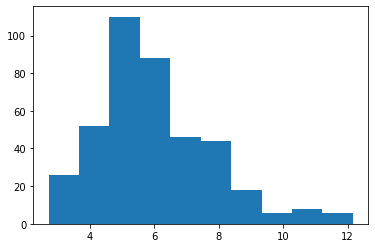

In [61]:
em = list(df_pmr_2[df_pmr_2["year"] == 2050]["el-emissions_total-mtco2e"])
plt.hist(em
plt.show()

In [21]:
arch0 = "Chile_sector_package_2021_01_30_design_id-0"
#get python outputs
df_py0 = sr.get_archive_run(sr.fp_csv_output_multi_sector, arch0)

df_py0[(df_py0["year"] == 2050)&(df_py0["master_id"] == 0)][["master_id"] + [x for x in df_py0.columns if (x[0:3] == "tx-")]]


,master_id,tx-CAPEX-MMUSD,tx-CAPEX_transport_bus-MMUSD,tx-CAPEX_transport_private-MMUSD,tx-CAPEX_transport_taxi-MMUSD,tx-CAPEX_transport_truck-MMUSD,tx-OPEX-MMUSD,tx-OPEX_transport_bus-MMUSD,tx-OPEX_transport_private-MMUSD,tx-OPEX_transport_taxi-MMUSD,...,tx-electricity_hydrogen-gwh,tx-electricity_total_demand-gwh,tx-emissions_aviation-mtco2e,tx-emissions_bus-mtco2e,tx-emissions_maritime-mtco2e,tx-emissions_private-mtco2e,tx-emissions_taxi-mtco2e,tx-emissions_total-mtco2e,tx-emissions_train-mtco2e,tx-emissions_truck-mtco2e
35,0,17935.143936,0.0,15963.12519,2.293138,1969.725609,19896.92009,346.062867,10447.603526,73.208344,...,42328.383952,56768.867554,5.049488,0.0,1.203196,12.999993,0.0,21.552199,0.092806,2.206715


In [35]:

arch2 = "Chile_sector_package_2021_02_10_design_id-2"
arch3 = "Chile_sector_package_2021_02_10_design_id-3"
df_attribute_master_id = sr.get_archive_run(sr.fp_csv_attribute_master, arch)
#get python outputs
df_py2 = sr.get_archive_run(sr.fp_csv_output_multi_sector, arch2)
df_py3 = sr.get_archive_run(sr.fp_csv_output_multi_sector, arch3)
#get experimental design outputs
#df_ed = sr.get_archive_run(sr.fp_csv_experimental_design_msec, arch)
#bring in both designs and reduce to 0
#df_ed = df_ed[df_ed["design_id"] == 0]
#get analytica outputs
df_an = sr.get_archive_run(sr.fp_csv_output_multi_sector_analytica, arch)


In [36]:
if False:
    dfe = df_ed[(df_ed["year"] == 2050) & (df_ed["design_id"] == 0) & (df_ed["strategy_id"] == 1) & (df_ed["time_series_id"] == 0)]
    lcheck = list(dfe["gr_pib"])
    plt.hist(lcheck)
    plt.show()
cols = [x for x in df_py2.columns if (x[0:3] == "tx-")]
df_py2[(df_py2["year"] == 2050)  & (df_py2["master_id"].isin([201, 203, 228, 399]))][["master_id"] + cols]



,master_id,tx-CAPEX-MMUSD,tx-CAPEX_transport_aviation-MMUSD,tx-CAPEX_transport_bus-MMUSD,tx-CAPEX_transport_private-MMUSD,tx-CAPEX_transport_private_modal_change-MMUSD,tx-CAPEX_transport_taxi-MMUSD,tx-CAPEX_transport_truck-MMUSD,tx-OPEX-MMUSD,tx-OPEX_transport_aviation-MMUSD,...,tx-electricity_hydrogen-gwh,tx-electricity_total_demand-gwh,tx-emissions_aviation-mtco2e,tx-emissions_bus-mtco2e,tx-emissions_maritime-mtco2e,tx-emissions_private-mtco2e,tx-emissions_taxi-mtco2e,tx-emissions_total-mtco2e,tx-emissions_train-mtco2e,tx-emissions_truck-mtco2e
7271,201,24713.402283,7286.716880,0.000000,15454.666657,0.0,2.293138,1969.725609,18230.914105,2021.053267,...,85257.131717,99697.615319,5.049488,0.0,1.203196,12.999993,0.0,21.552199,0.092806,2.206715
7343,203,23849.979655,8045.570272,0.000000,13899.706330,0.0,0.000000,1904.703052,18145.206222,1835.630735,...,90276.367770,108469.638812,5.142594,0.0,1.203196,13.161673,0.0,21.831238,0.084658,2.239117
8243,228,26571.792620,7981.933821,0.000000,16003.623304,0.0,24.351990,2561.883506,16267.258398,1664.928032,...,88935.998945,104957.969250,5.165514,0.0,1.203196,13.343983,0.0,22.088947,0.100597,2.275656
14399,399,27107.063547,8902.933495,33.580638,14372.858397,0.0,0.259269,3797.431748,18808.913623,2014.891065,...,91952.318554,110501.554737,5.588265,0.0,1.203196,13.705067,0.0,22.943518,0.095554,2.351435


In [37]:
df_py3[(df_py3["year"] == 2050)  & (df_py3["master_id"].isin([201, 203, 228, 399]))][["master_id"] + cols]

,master_id,tx-CAPEX-MMUSD,tx-CAPEX_transport_aviation-MMUSD,tx-CAPEX_transport_bus-MMUSD,tx-CAPEX_transport_private-MMUSD,tx-CAPEX_transport_private_modal_change-MMUSD,tx-CAPEX_transport_taxi-MMUSD,tx-CAPEX_transport_truck-MMUSD,tx-OPEX-MMUSD,tx-OPEX_transport_aviation-MMUSD,...,tx-electricity_hydrogen-gwh,tx-electricity_total_demand-gwh,tx-emissions_aviation-mtco2e,tx-emissions_bus-mtco2e,tx-emissions_maritime-mtco2e,tx-emissions_private-mtco2e,tx-emissions_taxi-mtco2e,tx-emissions_total-mtco2e,tx-emissions_train-mtco2e,tx-emissions_truck-mtco2e
7271,201,24713.402283,7286.716880,0.000000,15454.666657,0.0,2.293138,1969.725609,18230.914105,2021.053267,...,85257.131717,99697.615319,5.049488,0.0,1.203196,12.999993,0.0,21.552199,0.092806,2.206715
7343,203,23768.677732,8049.243916,0.000000,13899.706330,0.0,0.000000,1819.727485,17878.192512,1805.366727,...,86228.583904,104421.854945,5.142594,0.0,1.203196,13.161673,0.0,22.397309,0.084658,2.805189
8243,228,26226.905533,7871.419278,0.000000,16003.623304,0.0,24.351990,2327.510962,15745.265623,1553.266891,...,80673.113429,96695.083734,5.165514,0.0,1.203196,13.343983,0.0,23.268674,0.100597,3.455383
14399,399,24923.633011,8152.963407,33.580638,14372.858397,0.0,0.259269,2363.971299,16264.078682,1549.801076,...,56786.643727,75335.879910,5.588265,0.0,1.203196,13.705067,0.0,27.973384,0.095554,7.381301


In [41]:
df_py = pd.read_csv(sr.fp_csv_output_multi_sector)
cols = [x for x in df_py.columns if (x[0:3] == "tx-")]
df_py[(df_py["year"] == 2050)  & (df_py["master_id"].isin([201, 203, 228, 399]))][["master_id"] + cols]




,master_id,tx-CAPEX-MMUSD,tx-CAPEX_transport_aviation-MMUSD,tx-CAPEX_transport_bus-MMUSD,tx-CAPEX_transport_private-MMUSD,tx-CAPEX_transport_private_modal_change-MMUSD,tx-CAPEX_transport_taxi-MMUSD,tx-CAPEX_transport_truck-MMUSD,tx-OPEX-MMUSD,tx-OPEX_transport_aviation-MMUSD,...,tx-electricity_hydrogen-gwh,tx-electricity_total_demand-gwh,tx-emissions_aviation-mtco2e,tx-emissions_bus-mtco2e,tx-emissions_maritime-mtco2e,tx-emissions_private-mtco2e,tx-emissions_taxi-mtco2e,tx-emissions_total-mtco2e,tx-emissions_train-mtco2e,tx-emissions_truck-mtco2e
7271,201,12571.725579,822.898285,120.646254,9179.745097,476.417198,2.293138,1969.725609,16085.492600,1726.362605,...,85049.272025,97080.208290,4.545170,0.0,1.203196,10.243943,0.0,18.291830,0.092806,2.206715
7343,203,17425.671424,335.785577,53.260768,15309.990346,104.080077,2.875795,1619.678860,13923.537125,1445.985454,...,57871.613226,71684.604474,5.314292,0.0,1.203196,10.968200,0.0,23.600093,0.101806,6.012599
8243,228,15574.733768,546.702723,39.952675,13442.038782,94.886612,2.366096,1448.786879,13202.018444,1120.196153,...,50193.675043,58911.021564,4.750337,0.0,1.203196,17.906856,0.0,31.121716,0.087772,7.173556
14399,399,14124.079067,317.107583,16.436254,11973.249116,292.350929,0.000000,1524.935183,11456.175722,1104.965085,...,54874.870071,70135.659096,5.243552,0.0,1.203196,9.144411,0.0,21.388571,0.089692,5.707720


In [5]:
import importlib
import sector_model_transport as smt 

# Transportation correction for econometric model
df_tmp_correction_for_pib_peso_traj = pd.read_csv(sr.fp_csv_tmp_correction_for_pib_peso_traj)
#get baseline data from experimental design
df_tmp_correction_for_pib_peso_traj = pd.merge(df_tmp_correction_for_pib_peso_traj, df_ed[df_ed["master_id"] == 0][["year", "pib"]].copy(), how = "left", on = ["year"]).reset_index(drop = True)
#add scalar and string name
str_pib_scalar = "pib_scalar_transport"
df_tmp_correction_for_pib_peso_traj[str_pib_scalar] = np.array(df_tmp_correction_for_pib_peso_traj["pib_peso_luis_20201218"])/np.array(df_tmp_correction_for_pib_peso_traj["pib"])
df_tmp_correction_for_pib_peso_traj = df_tmp_correction_for_pib_peso_traj[["year", str_pib_scalar]]

exp_design = pd.merge(df_ed, df_tmp_correction_for_pib_peso_traj, how = "left", on = ["year"]).sort_values(by = ["master_id", "year"]).reset_index(drop = True)



In [7]:
importlib.reload(smt)

temp = smt.sm_transport(exp_design, {"transport": "tx"})

out2 = np.round(temp["transport_pkm_aviation"].copy(), 2)
#out3 = np.round(temp["transport_pkm_aviation"].copy(), 2)
sat = np.array(exp_design["transport_saturation_aviation"])


In [25]:
df_ed["transport_pkm_aviation"]

0        1.125243e+07
1        1.165476e+07
2        1.291461e+07
3        1.391305e+07
4        1.469566e+07
             ...     
43411    6.508414e+07
43412    6.806080e+07
43413    7.113009e+07
43414    7.427752e+07
43415    7.751087e+07
Name: transport_pkm_aviation, Length: 28944, dtype: float64

In [250]:
year = np.array(exp_design["year"])
gdp = np.array(exp_design["pib"])*np.array(exp_design["pib_scalar_transport"])
#plt.hist()
#plt.show()


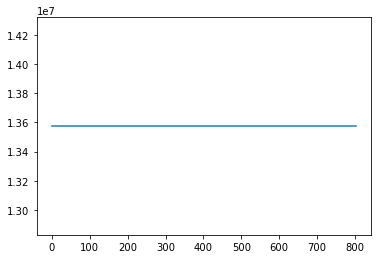

In [9]:
ms = np.array(range(0, 804))#np.array(exp_design[exp_design.iloc[[i*36-1 for i in range(1, int(n/36))]]])
y = np.array([out2[i*36 - 1] for i in range(1, int(len(exp_design)/36) + 1)])

plt.plot(ms, y)
plt.show()



In [203]:
a = 0.3113
b = 0.8437
c = -1.0978

pkm_2015 = 10862059  # [pkm]
pkm_2016 = 12200515  # [pkm]
pkm_2017 = 13134871  # [pkm]

# Creacion de la variable a contener la demanda energetica
pkm_aviation = np.ones(len(year))

In [221]:
n = 28000
pkm_aviation = np.ones(n)
for i in range(n):
    if year[i] == 2015:
        pkm_aviation[i] = pkm_2015
    elif year[i] == 2016:
        pkm_aviation[i] = pkm_2016
    elif year[i] == 2017:
        pkm_aviation[i] = pkm_2017
    else:
        pkm_aviation[i] = np.exp(a * np.log(gdp[i]) + b * np.log(pkm_aviation[i - 1]) + c)


In [220]:
set([year[i*36 - 1] for i in range(1, int(n/36) + 1)])

{2050}

In [222]:
out = np.round(pkm_aviation/(10**6), 2)
[out[i*36 - 1] for i in range(1, int(n/36) + 1)]

[68.81,
 60.98,
 70.53,
 64.14,
 75.04,
 66.36,
 68.09,
 65.93,
 60.26,
 71.38,
 72.78,
 68.77,
 68.31,
 74.17,
 69.98,
 61.61,
 65.79,
 64.64,
 60.17,
 63.81,
 72.96,
 75.33,
 64.22,
 60.01,
 76.06,
 64.81,
 72.92,
 72.51,
 75.21,
 63.43,
 62.72,
 63.06,
 73.86,
 76.34,
 76.29,
 61.69,
 73.7,
 71.4,
 74.6,
 67.33,
 66.88,
 73.44,
 76.41,
 68.43,
 62.51,
 62.89,
 71.78,
 74.31,
 72.04,
 64.01,
 63.6,
 62.14,
 65.03,
 70.09,
 70.34,
 67.27,
 74.71,
 71.18,
 73.91,
 71.64,
 60.75,
 69.57,
 65.85,
 65.13,
 60.52,
 64.91,
 65.11,
 70.8,
 63.97,
 74.41,
 60.62,
 69.39,
 71.05,
 59.55,
 67.05,
 68.74,
 75.73,
 67.68,
 65.72,
 70.65,
 69.47,
 75.7,
 70.44,
 74.94,
 69.1,
 76.2,
 70.23,
 75.46,
 62.53,
 67.49,
 74.72,
 62.64,
 75.95,
 74.85,
 73.62,
 73.56,
 66.09,
 61.22,
 59.38,
 60.43,
 66.53,
 62.32,
 60.08,
 67.98,
 63.27,
 60.97,
 69.8,
 64.48,
 71.74,
 59.37,
 64.74,
 62.35,
 61.08,
 72.28,
 66.73,
 75.45,
 60.66,
 64.33,
 69.27,
 69.72,
 76.08,
 65.47,
 59.74,
 75.85,
 69.9,
 72.63,
 6

In [196]:
#df_py[(df_py["year"] == 2050) & (df_py["master_id"].isin([202, 250, 300, 350, 400]))][[x for x in df_py.columns if x[0:3] == "tx-"]]
#tx-OPEX_transport_aviation-MMUSD
#tx-electricity_hydrogen-gwh
#tx-electricity_total_demand-gwh
#tx-emissions_aviation-mtco2e
#transport_emission_aviation = transport_demand_aviation_kerosene * fact * emission_fact_kerosene_aviation / (10 ** 9)





In [50]:
max(df_attribute_master_id_01["master_id"]) + 1

1608

In [51]:
archs = {
    0: "Chile_sector_package_2021_01_30_design_id-0",
    1: "Chile_sector_package_2021_01_30_design_id-1",
    2: "Chile_sector_package_2021_02_10_design_id-2",
    3: "Chile_sector_package_2021_02_10_design_id-3"
}

df_attribute_master_id_01 = sr.get_archive_run(sr.fp_csv_attribute_master, archs[0])
df_attribute_master_id_23 = sr.get_archive_run(sr.fp_csv_attribute_master, archs[2])
#set the value to shift up the second master attribute by
sv = max(df_attribute_master_id_01["master_id"]) + 1
#update 23 master id
df_attribute_master_id_23["master_id"] = np.array(df_attribute_master_id_23["master_id"]) + sv
df_attribute_master_id_23["design_id"] = df_attribute_master_id_23["design_id"].replace({0: 2, 1: 3})

df_attribute_master_id = pd.concat([df_attribute_master_id_01, df_attribute_master_id_23], axis = 0).reset_index(drop = True)

#get  outputs
dfs_an = {}
dfs_ed = {}
dfs_pmr = {}
dfs_py = {}

for k in archs.keys():
    
    #analytica
    dfs_an.update({k: sr.get_archive_run(sr.fp_csv_output_multi_sector_analytica, archs[k])})
    
    #experimental design
    df_tmp = sr.get_archive_run(sr.fp_csv_experimental_design_msec, archs[k])
    df_tmp = df_tmp[df_tmp["design_id"] == 0]
    #replace
    df_tmp["design_id"] = df_tmp["design_id"].replace({0: int(k)})
    #get ordering
    fields_ord = [x for x in df_tmp.columns if (x != "master_id")]
    df_tmp = df_tmp[fields_ord]
    fields_merge = [x for x in df_attribute_master_id.columns if (x != "master_id") and (x in df_tmp.columns)]
    #merge in new masters
    df_tmp = pd.merge(df_tmp, df_attribute_master_id, how = "left", on = fields_merge).reset_index(drop = True)
    
    dfs_ed.update({k: df_tmp})
    
    #python
    dfs_py.update({k: sr.get_archive_run(sr.fp_csv_output_multi_sector, archs[k])})
    
    #get pmr outputs
    dfs_pmr.update({k: sr.get_archive_run(sr.fp_csv_output_multi_sector_pmr, archs[k])})

#update the experimental design


    
dict_dsubs = {}
fields_merge = ["strategy_id", "time_series_id", "future_id"]

for d in df_attribute_master_id["design_id"].unique():
    df_tmp = df_attribute_master_id[df_attribute_master_id["design_id"] == d].copy()
    df_tmp = df_tmp[[x for x in df_tmp.columns if (x not in ["design_id", "run_id"])]]
    dict_rnm = {"master_id": ("master_id-" + str(d))}
    df_tmp = df_tmp.rename(columns = dict_rnm)
    
    dict_dsubs.update({d: df_tmp})

ddk = list(dict_dsubs.keys())
ddk.sort()

#merge map
df_merge_map = dict_dsubs[ddk[0]].copy()
for k in ddk[1:len(ddk)]:
    df_merge_map = pd.merge(df_merge_map, dict_dsubs[k].copy(), how = "inner", on = fields_merge)
    
df_merge_map = df_merge_map.sort_values(by = ["master_id-" + str(ddk[0])]).reset_index(drop = True)

#build dfs out
df_py_out = [dfs_py[0]]
df_an_out = [dfs_an[0]]
df_pmr_out = [dfs_pmr[0]]
df_ed_out = [dfs_ed[0]]
    
#update ids
for k in list(set(archs.keys()) - set({0})):
    #build conversion dictionary
    dict_convert = sr.build_dict(df_merge_map[["master_id-0", "master_id-" + str(k)]])
        
    dfs_py[k]["master_id"] = dfs_py[k]["master_id"].replace(dict_convert)
    df_py_out.append(dfs_py[k])
    dfs_an[k]["master_id"] = dfs_an[k]["master_id"].replace(dict_convert)
    df_an_out.append(dfs_an[k])
    dfs_pmr[k]["master_id"] = dfs_pmr[k]["master_id"].replace(dict_convert)
    df_pmr_out.append(dfs_pmr[k])
    
    df_ed_out.append(dfs_ed[k])

#connect together
df_py_out = pd.concat(df_py_out, axis = 0).sort_values(by = ["master_id", "year"]).reset_index(drop = True)
df_an_out = pd.concat(df_an_out, axis = 0).sort_values(by = ["master_id", "year"]).reset_index(drop = True)
df_ed_out = pd.concat(df_ed_out, axis = 0).sort_values(by = ["master_id", "year"]).reset_index(drop = True)
df_pmr_out = pd.concat(df_pmr_out, axis = 0).sort_values(by = ["master_id", "year"]).reset_index(drop = True)

df_py_out = df_py_out.fillna(0.0)
df_an_out = df_an_out.fillna(0.0)

#reduce the output experimental design
fields_scen = ["master_id", "design_id", "time_series_id", "strategy_id", "future_id", "year"]
fields_ord = [x for x in list(dfs_ed[0].columns) if (x not in fields_scen) and (x not in ["run_id", ""])]
fields_ord.sort()
df_ed_out = df_ed_out[fields_scen + fields_ord]

#write output
df_py_out.to_csv(sr.fp_csv_output_multi_sector, index = None, encoding = "UTF-8")
df_an_out.to_csv(sr.fp_csv_output_multi_sector_analytica, index = None, encoding = "UTF-8")
df_pmr_out.to_csv(sr.fp_csv_output_multi_sector_pmr, index = None, encoding = "UTF-8")
df_ed_out.to_csv(sr.fp_csv_experimental_design_msec, index = None, encoding = "UTF-8")
df_attribute_master_id.to_csv(sr.fp_csv_attribute_master, index = None, encoding = "UTF-8")


In [233]:
df_edgams = pd.read_csv(sr.fp_csv_experimental_design_msec_masters_to_run_gams)
df_edrun = pd.read_csv(sr.fp_csv_experimental_design_msec_masters_to_run)#sr.get_archive_run(sr.fp_csv_experimental_design_msec_masters_to_run_gams, arch_2)
df_mas = pd.read_csv(sr.fp_csv_attribute_master)#sr.get_archive_run(sr.fp_csv_attribute_master, arch_2)
df_edgams = pd.merge(df_edgams, df_mas, how = "left", on = ["master_id"])

df_edgams["strategy_id"] = df_edgams["strategy_id"].replace({1: -1})
df_edgams = df_edgams.sort_values(by = ["strategy_id", "future_id"])
df_edgams["strategy_id"] = df_edgams["strategy_id"].replace({-1: 1})
df_edgams = df_edgams[["master_id"]].reset_index(drop = True)
df_edgams.to_csv(sr.fp_csv_experimental_design_msec_masters_to_run_gams, index = None, encoding = "UTF-8")



In [242]:
df_edgams.shape[0]

690

In [86]:

archs = {
    1: "Chile_sector_package_2021_02_20_design_id-1",
    3: "Chile_sector_package_2021_02_20_design_id-3"
}
#set the design id from the current dataset to pull by target design (key)
archs_design_pull = {
    1: 1,
    3: 0
}
#designs to conver the id from id
df_attribute_master_id_01 = sr.get_archive_run(sr.fp_csv_attribute_master, archs[1])
df_attribute_master_id_23 = sr.get_archive_run(sr.fp_csv_attribute_master, archs[3])
#set the value to shift up the second master attribute by
sv = max(df_attribute_master_id_01["master_id"]) + 1
#update 23 master id
df_attribute_master_id_23["master_id"] = np.array(df_attribute_master_id_23["master_id"]) + sv
df_attribute_master_id_23["design_id"] = df_attribute_master_id_23["design_id"].replace({0: 2, 1: 3})

df_attribute_master_id = pd.concat([df_attribute_master_id_01, df_attribute_master_id_23], axis = 0).reset_index(drop = True)

#get  outputs
dfs_an = {}
dfs_ed = {}
dfs_pmr = {}
dfs_py = {}

for k in archs.keys():
    
    #analytica
    dfs_an.update({k: sr.get_archive_run(sr.fp_csv_output_multi_sector_analytica, archs[k])})
    
    #experimental design
    df_tmp = sr.get_archive_run(sr.fp_csv_experimental_design_msec, archs[k])
    df_tmp = df_tmp[df_tmp["design_id"] == archs_design_pull[k]]
    #replace
    df_tmp["design_id"] = df_tmp["design_id"].replace({archs_design_pull[k]: int(k)})
    #get ordering
    fields_ord = [x for x in df_tmp.columns if (x != "master_id")]
    df_tmp = df_tmp[fields_ord]
    fields_merge = [x for x in df_attribute_master_id.columns if (x != "master_id") and (x in df_tmp.columns)]
    #merge in new masters
    df_tmp = pd.merge(df_tmp, df_attribute_master_id, how = "left", on = fields_merge).reset_index(drop = True)
    
    dfs_ed.update({k: df_tmp})
    
    #python
    dfs_py.update({k: sr.get_archive_run(sr.fp_csv_output_multi_sector, archs[k])})
    
    #get pmr outputs
    dfs_pmr.update({k: sr.get_archive_run(sr.fp_csv_output_multi_sector_pmr, archs[k])})


    
dict_dsubs = {}
fields_merge = ["strategy_id", "time_series_id", "future_id"]

for d in df_attribute_master_id["design_id"].unique():
    df_tmp = df_attribute_master_id[df_attribute_master_id["design_id"] == d].copy()
    df_tmp = df_tmp[[x for x in df_tmp.columns if (x not in ["design_id", "run_id"])]]
    dict_rnm = {"master_id": ("master_id-" + str(d))}
    df_tmp = df_tmp.rename(columns = dict_rnm)
    
    dict_dsubs.update({d: df_tmp})

ddk = list(dict_dsubs.keys())
ddk.sort()

#merge map
df_merge_map = dict_dsubs[ddk[0]].copy()
for k in ddk[1:len(ddk)]:
    df_merge_map = pd.merge(df_merge_map, dict_dsubs[k].copy(), how = "inner", on = fields_merge)
    
df_merge_map = df_merge_map.sort_values(by = ["master_id-" + str(ddk[0])]).reset_index(drop = True)

k0 = list(archs.keys())
k0.sort()
#build dfs out
df_py_out = [dfs_py[k0[0]]]
df_an_out = [dfs_an[k0[0]]]
df_pmr_out = [dfs_pmr[k0[0]]]
df_ed_out = [dfs_ed[k0[0]]]
    
#update ids
for k in list(set(archs.keys()) - set({k0[0]})):
    #get origin design
    d_orig = int(archs_design_pull[k])
    #build conversion dictionary
    dict_convert = sr.build_dict(df_merge_map[["master_id-" + str(d_orig), "master_id-" + str(k)]])
        
    dfs_py[k]["master_id"] = dfs_py[k]["master_id"].replace(dict_convert)
    df_py_out.append(dfs_py[k])
    dfs_an[k]["master_id"] = dfs_an[k]["master_id"].replace(dict_convert)
    df_an_out.append(dfs_an[k])
    dfs_pmr[k]["master_id"] = dfs_pmr[k]["master_id"].replace(dict_convert)
    df_pmr_out.append(dfs_pmr[k])
    
    df_ed_out.append(dfs_ed[k])

#connect together
df_py_out = pd.concat(df_py_out, axis = 0).sort_values(by = ["master_id", "year"]).reset_index(drop = True)
df_an_out = pd.concat(df_an_out, axis = 0).sort_values(by = ["master_id", "year"]).reset_index(drop = True)
df_ed_out = pd.concat(df_ed_out, axis = 0).sort_values(by = ["master_id", "year"]).reset_index(drop = True)
df_pmr_out = pd.concat(df_pmr_out, axis = 0).sort_values(by = ["master_id", "year"]).reset_index(drop = True)

df_py_out = df_py_out.fillna(0.0)
df_an_out = df_an_out.fillna(0.0)

#reduce the output experimental design
fields_scen = ["master_id", "design_id", "time_series_id", "strategy_id", "future_id", "year"]
fields_ord = [x for x in list(df_ed_out.columns) if (x not in fields_scen) and (x not in ["run_id", ""])]
fields_ord.sort()
df_ed_out = df_ed_out[fields_scen + fields_ord]

#write output
df_py_out.to_csv(sr.fp_csv_output_multi_sector, index = None, encoding = "UTF-8")
df_an_out.to_csv(sr.fp_csv_output_multi_sector_analytica, index = None, encoding = "UTF-8")
df_pmr_out.to_csv(sr.fp_csv_output_multi_sector_pmr, index = None, encoding = "UTF-8")
df_ed_out.to_csv(sr.fp_csv_experimental_design_msec, index = None, encoding = "UTF-8")
df_attribute_master_id.to_csv(sr.fp_csv_attribute_master, index = None, encoding = "UTF-8")


In [76]:
#write output
df_py_out.to_csv(sr.fp_csv_output_multi_sector, index = None, encoding = "UTF-8")
df_an_out.to_csv(sr.fp_csv_output_multi_sector_analytica, index = None, encoding = "UTF-8")
df_pmr_out.to_csv(sr.fp_csv_output_multi_sector_pmr, index = None, encoding = "UTF-8")
df_ed_out.to_csv(sr.fp_csv_experimental_design_msec, index = None, encoding = "UTF-8")
df_attribute_master_id.to_csv(sr.fp_csv_attribute_master, index = None, encoding = "UTF-8")


In [89]:
set(df_pmr_out["master_id"])

{804,
 805,
 806,
 807,
 808,
 809,
 810,
 811,
 812,
 813,
 814,
 815,
 816,
 817,
 818,
 819,
 820,
 821,
 822,
 823,
 824,
 825,
 826,
 827,
 828,
 829,
 830,
 831,
 832,
 833,
 834,
 835,
 836,
 837,
 838,
 839,
 840,
 841,
 842,
 843,
 844,
 845,
 846,
 847,
 848,
 849,
 850,
 851,
 852,
 853,
 854,
 855,
 856,
 857,
 858,
 859,
 860,
 861,
 862,
 863,
 864,
 865,
 866,
 867,
 868,
 869,
 870,
 871,
 872,
 873,
 874,
 875,
 876,
 877,
 878,
 879,
 880,
 881,
 882,
 883,
 884,
 885,
 886,
 887,
 888,
 889,
 890,
 891,
 892,
 893,
 894,
 895,
 896,
 897,
 898,
 899,
 900,
 901,
 902,
 903,
 904,
 905,
 906,
 907,
 908,
 909,
 910,
 911,
 912,
 913,
 914,
 915,
 916,
 917,
 918,
 919,
 920,
 921,
 922,
 923,
 924,
 925,
 926,
 927,
 928,
 929,
 930,
 931,
 932,
 933,
 934,
 935,
 936,
 937,
 938,
 939,
 940,
 941,
 942,
 943,
 944,
 945,
 946,
 947,
 948,
 949,
 950,
 951,
 952,
 953,
 954,
 955,
 956,
 957,
 958,
 959,
 960,
 961,
 962,
 963,
 964,
 965,
 966,
 967,
 968,
 969,
 970

In [79]:
sr.fp_csv_experimental_design_msec

'/Users/jsyme/Documents/Projects/FY20/SWCHE102-1000/git/MultiSector_LTS_Chile/experimental_design/experimental_design_multi_sector.csv'

In [80]:
df_pydfs_py_out.shape

(86832, 74)

In [84]:
dfs_py[3].shape

(28944, 74)